In [1]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip

--2025-04-23 23:56:08--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.237.69, 52.217.71.54, 54.231.229.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.237.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229734282 (219M) [application/zip]
Saving to: ‘flower-photos.zip’

flower-photos.zip   100%[===================>] 219.09M  48.8MB/s    in 5.0s    

2025-04-23 23:56:14 (44.1 MB/s) - ‘flower-photos.zip’ saved [229734282/229734282]



In [2]:
!unzip flower-photos.zip

Archive:  flower-photos.zip
   creating: flower_photos/
  inflating: flower_photos/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/flower_photos/
  inflating: __MACOSX/flower_photos/._.DS_Store  
  inflating: flower_photos/LICENSE.txt  
   creating: flower_photos/test/
  inflating: flower_photos/test/.DS_Store  
   creating: __MACOSX/flower_photos/test/
  inflating: __MACOSX/flower_photos/test/._.DS_Store  
   creating: flower_photos/test/daisy/
  inflating: flower_photos/test/daisy/14332947164_9b13513c71_m.jpg  
  inflating: flower_photos/test/daisy/14333681205_a07c9f1752_m.jpg  
  inflating: flower_photos/test/daisy/14350958832_29bdd3a254.jpg  
  inflating: flower_photos/test/daisy/14354051035_1037b30421_n.jpg  
  inflating: flower_photos/test/daisy/14372713423_61e2daae88.jpg  
  inflating: flower_photos/test/daisy/14399435971_ea5868c792.jpg  
  inflating: flower_photos/test/daisy/14402451388_56545a374a_n.jpg  
  inflating: flower_photos/test/daisy/14421389519_d5fd353eb4.jpg

In [3]:
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

In [4]:
# Check CUDA availability and assign appropriate device
print(torch.cuda.is_available())  # Should print True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [6]:
# Define directory paths for dataset
# Dataset: flower_photos from Udacity (5 flower classes)

data_dir = 'flower_photos'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Class labels (5 types of flowers)
classes = ['daisy' , 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
# Define image transforms: random crop and tensor conversion

data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

print('Num training images: ', len(train_data))
print('Num testing images: ', len(test_data))

Num training images:  3130
Num testing images:  540


In [8]:
batch_size = 20
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [15]:
!nvidia-smi

Thu Apr 24 00:03:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

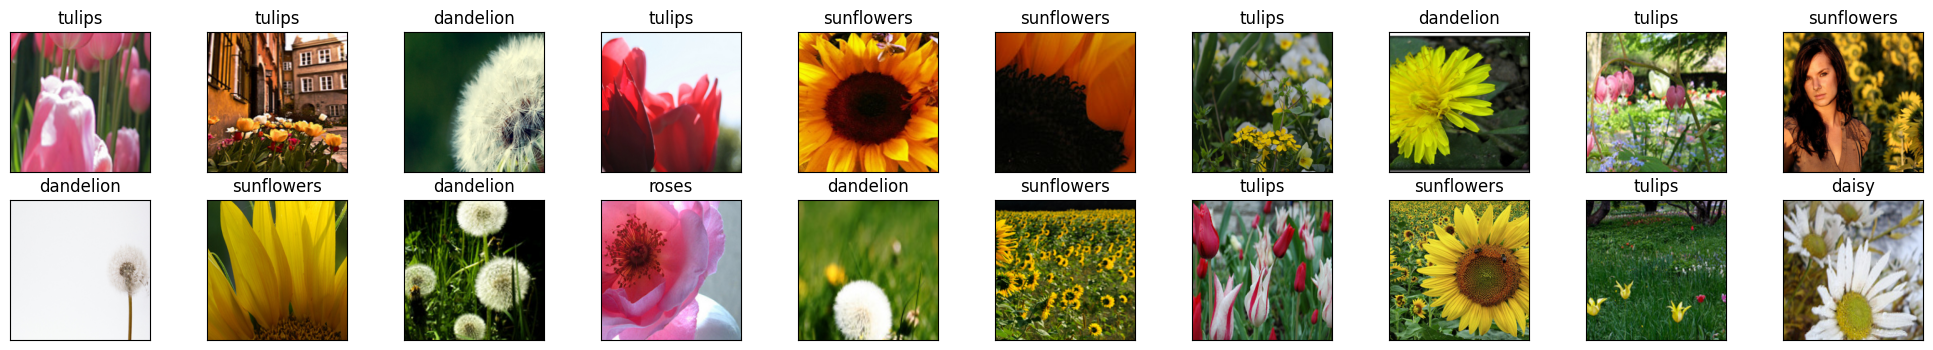

In [14]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks =[], yticks = [])
  plt.imshow(np.transpose(images[idx], (1,2,0)))
  ax.set_title(classes[labels[idx]])

In [16]:
#Load the pre-trained model from pythorch

vgg16 = models.vgg16(pretrained=True)

print(vgg16)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 66.1MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
# Examine the final classification layer

print(vgg16.classifier[6])
print(vgg16.classifier[6].in_features)
print(vgg16.classifier[6].out_features)

Linear(in_features=4096, out_features=1000, bias=True)
4096
1000


In [18]:
list(vgg16.features.parameters())

[Parameter containing:
 tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
           [-5.8312e-01,  3.5655e-01,  7.6566e-01],
           [-6.9022e-01, -4.8019e-02,  4.8409e-01]],
 
          [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
           [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
           [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],
 
          [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
           [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
           [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],
 
 
         [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
           [-4.2805e-01, -2.4349e-01,  2.4628e-01],
           [-2.5066e-01,  1.4177e-01, -5.4864e-03]],
 
          [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
           [-8.4127e-01, -3.5176e-01,  5.6398e-01],
           [-2.4194e-01,  5.1928e-01,  5.3915e-01]],
 
          [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
           [-4.7144e-01, -1.5503e-01,  3.4589e-01],
           [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],
 
 
         [[[ 1.77

In [19]:
# Freeze feature extractor layers (prevent training)

for param in vgg16.features.parameters():
    param.requires_grad = False

In [22]:
# Replace the final classification layer to match our number of flower classes

import torch.nn as nn

n_inputs = vgg16.classifier[6].in_features

last_layer = nn.Linear(n_inputs, len(classes)) # 5 output classes

vgg16.classifier[6] = last_layer

# Move model to GPU if available
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
  vgg16.cuda()

print(vgg16.classifier[6].out_features)
print(vgg16)

5
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [23]:
# Define loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [25]:
n_epochs = 2 # Training loop for 2 epochs

# Training loop begins
for epoch in range(1, n_epochs + 1):
    train_loss = 0.0  # Accumulate training loss for this epoch

    # Iterate over mini-batches in the training set
    for batch_i, (data, target) in enumerate(train_loader):
        # Move data to GPU if available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()  # Clear previous gradients
        output = vgg16(data)   # Forward pass through the model
        loss = criterion(output, target)  # Compute cross-entropy loss

        loss.backward()  # Backpropagation: compute gradients
        optimizer.step()  # Update model parameters
        train_loss += loss.item()  # Accumulate batch loss

        # Print progress every 20 batches
        if batch_i % 20 == 19:
            print('Epoch %d, Batch %d loss: %.16f' % (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0  # Reset running loss for display

Epoch 1, Batch 20 loss: 1.5079034507274627
Epoch 1, Batch 40 loss: 1.3546387851238251
Epoch 1, Batch 60 loss: 1.1673912227153778
Epoch 1, Batch 80 loss: 1.1323986262083054
Epoch 1, Batch 100 loss: 1.0563175141811372
Epoch 1, Batch 120 loss: 1.0264806628227234
Epoch 1, Batch 140 loss: 0.9417067766189575
Epoch 2, Batch 20 loss: 0.9140567719936371
Epoch 2, Batch 40 loss: 0.8362278163433075
Epoch 2, Batch 60 loss: 0.7843745201826096
Epoch 2, Batch 80 loss: 0.8679511100053787
Epoch 2, Batch 100 loss: 0.8027416855096817
Epoch 2, Batch 120 loss: 0.7822622671723366
Epoch 2, Batch 140 loss: 0.7540196627378464


In [29]:
# Begin evaluation on test dataset

test_loss = 0.0  # Total test loss
class_correct = list(0. for i in range(5))  # Track correct predictions per class
class_total = list(0. for i in range(5))    # Track total samples per class

vgg16.eval()  # Set model to evaluation mode (disable dropout, batchnorm)

# Iterate over the test set
for data, target in test_loader:
  if train_on_gpu:
    data, target = data.cuda(), target.cuda()
  output = vgg16(data) #Get model predictions
  loss =criterion(output, target) #Compute batch loss

  test_loss += loss.item()*data.size(0) #Multiply by batch size to accumulate total

  _, pred = torch.max(output, 1) # Get predicted class (index of max logit)
  correct_tensor = pred.eq(target.data.view_as(pred)) #Check predictions
  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

  for i in range(batch_size): #Track accuracy per class
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1

# Compute average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

#Print accuracy per class
for i in range(5):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
        classes[i], 100 * class_correct[i] / class_total[i],
        np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.736302

Test Accuracy of daisy: 71% (66/92)
Test Accuracy of dandelion: 89% (118/132)
Test Accuracy of roses: 65% (60/91)
Test Accuracy of sunflowers: 79% (80/101)
Test Accuracy of tulips: 61% (76/124)

Test Accuracy (Overall): 74% (400/540)


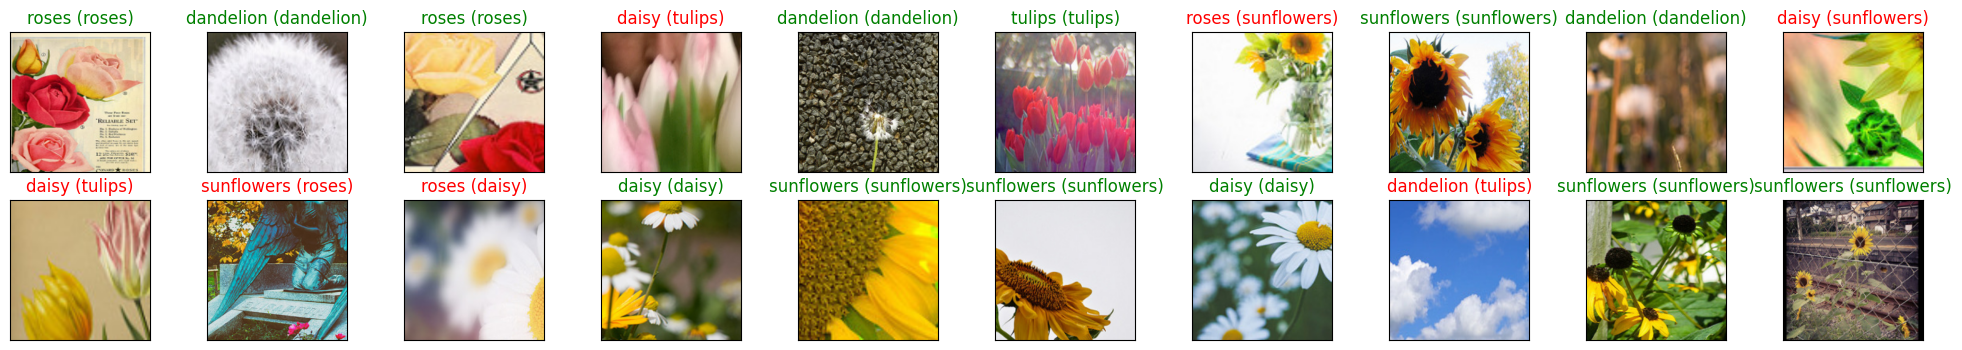

In [31]:
# Visualize model predictions for a test batch

dataiter = iter(test_loader)
images, labels = next(dataiter)

if train_on_gpu:
  images = images.cuda()

output = vgg16(images)

_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(images[idx].cpu(), (1, 2, 0)))
  ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
               color = ('green' if preds[idx]==labels[idx].item() else 'red'))